In [1]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("task_1.csv")


In [3]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [6]:
df.drop("Booking_ID", axis=1, inplace=True)


In [7]:
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')
df = df.dropna(subset=['date of reservation'])
df['reservation_month'] = df['date of reservation'].dt.month

In [8]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,reservation_month
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,Not_Canceled,10
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,Not_Canceled,11
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,Canceled,2
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,Canceled,5
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,Canceled,4


In [9]:
df["lead time"].value_counts()

lead time
0      1295
1      1078
2       643
4       627
3       626
       ... 
348       1
352       1
328       1
300       1
355       1
Name: count, Length: 352, dtype: int64

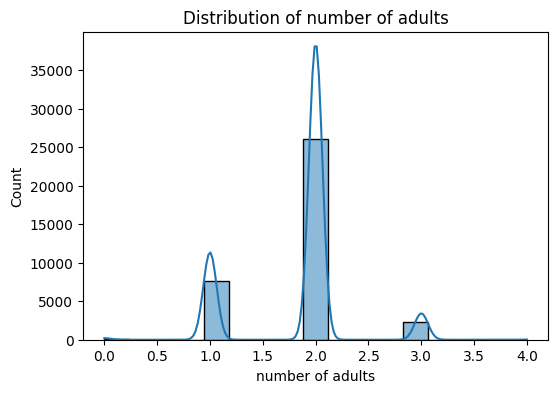

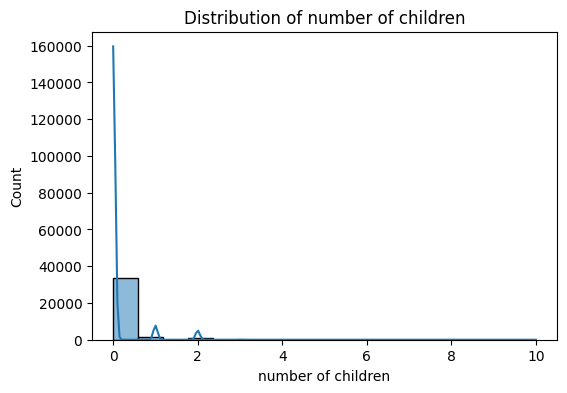

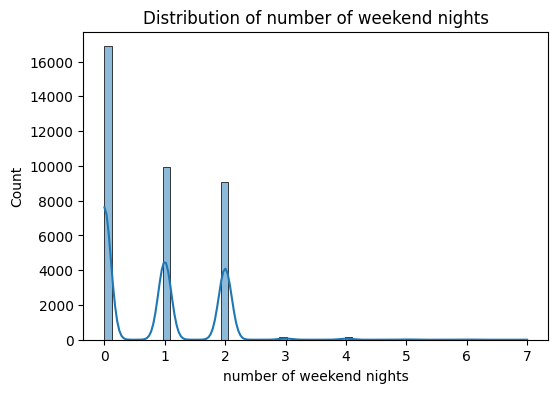

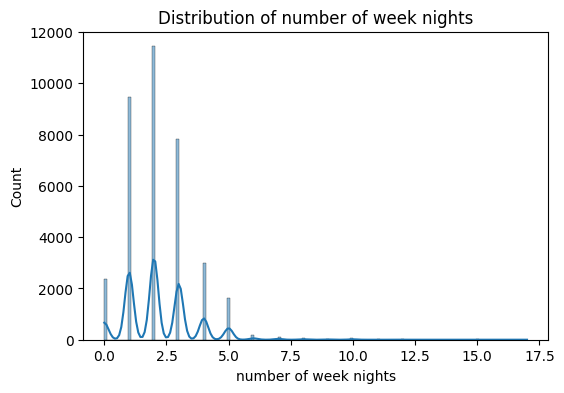

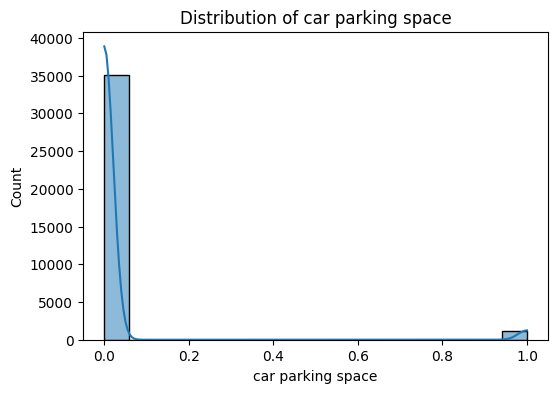

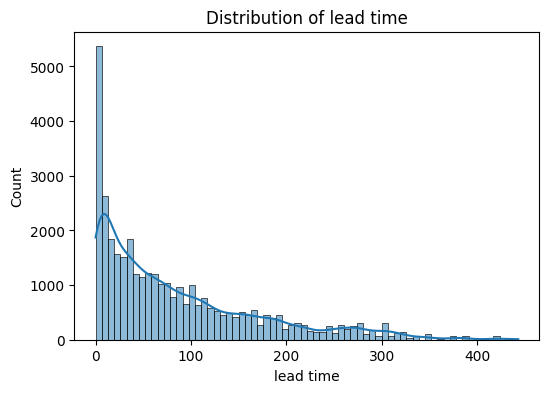

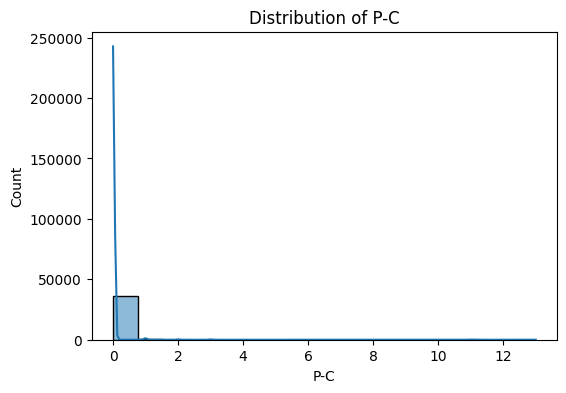

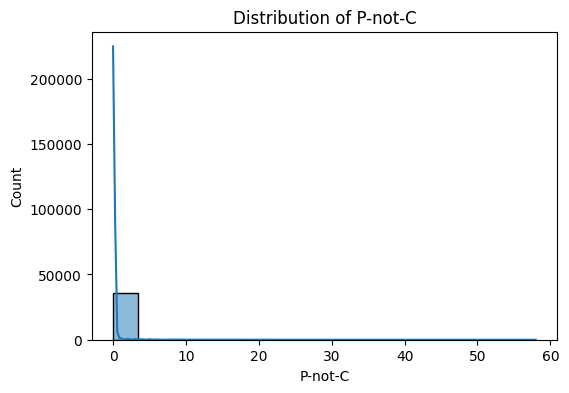

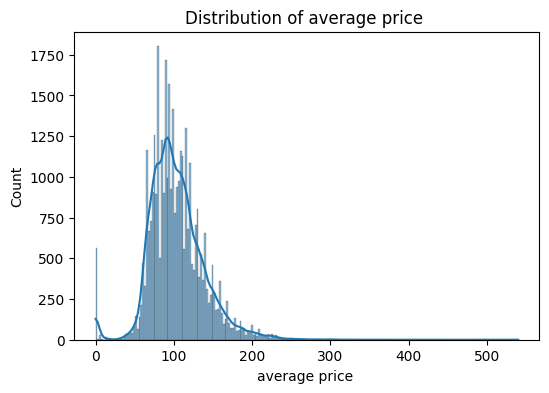

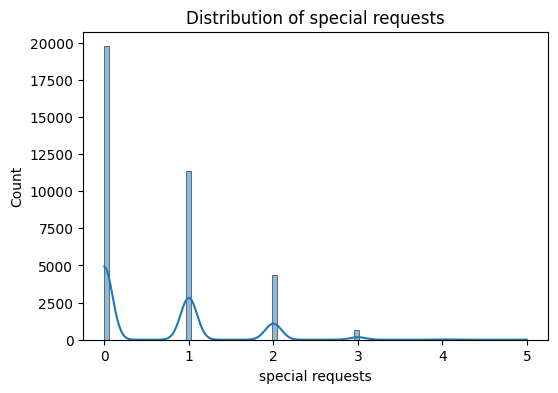

In [10]:
numeric_cols = ['number of adults', 'number of children', 'number of weekend nights',
                'number of week nights', 'car parking space', 'lead time',
                'P-C', 'P-not-C', 'average price ', 'special requests']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

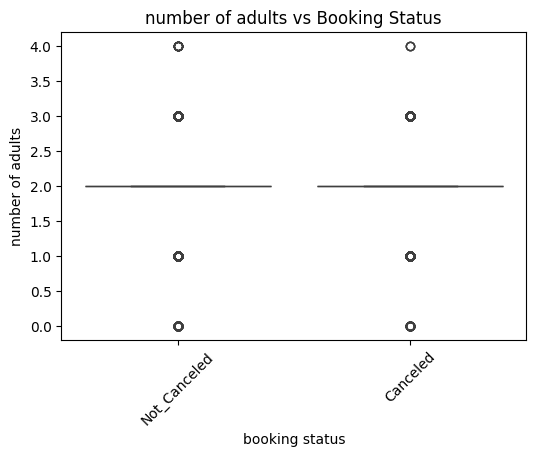

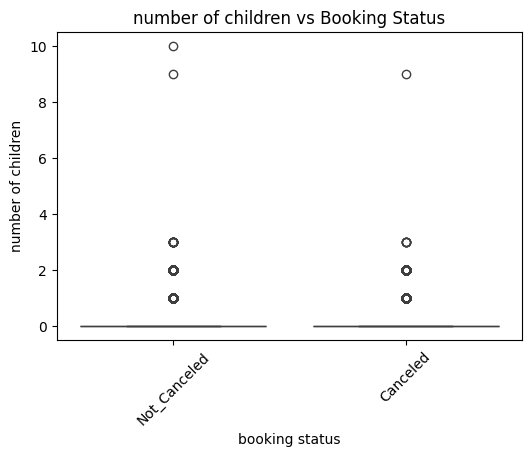

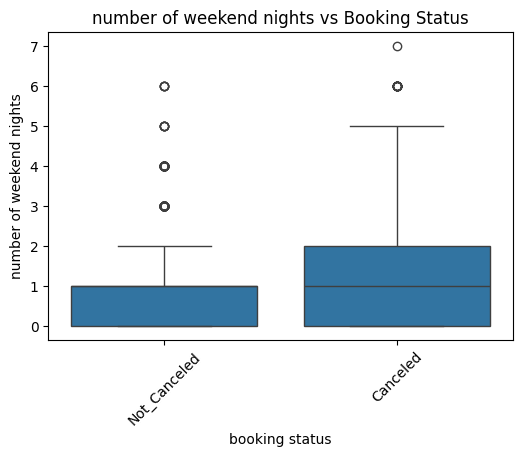

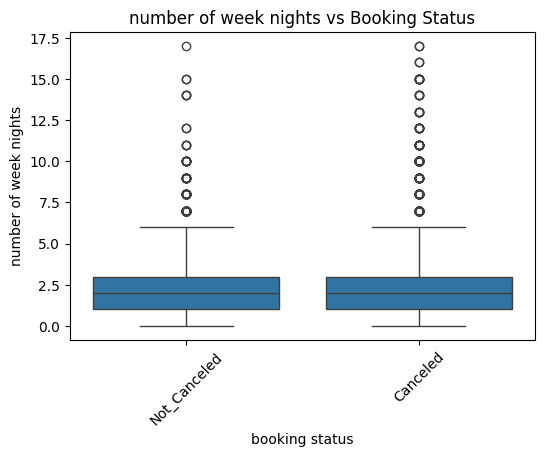

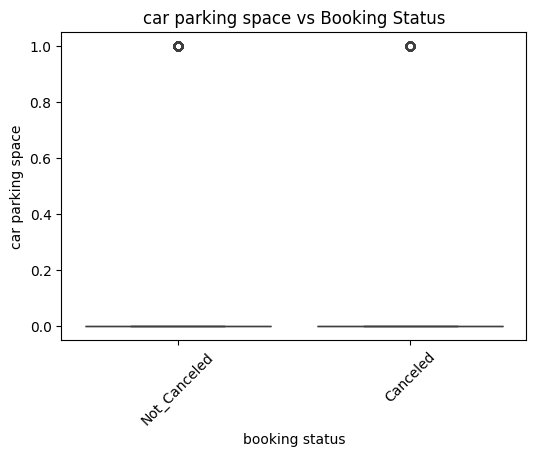

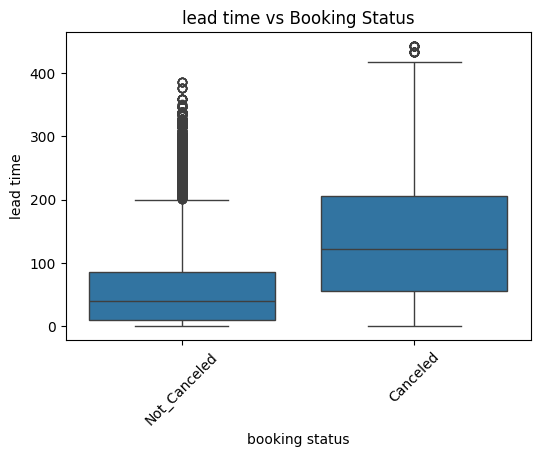

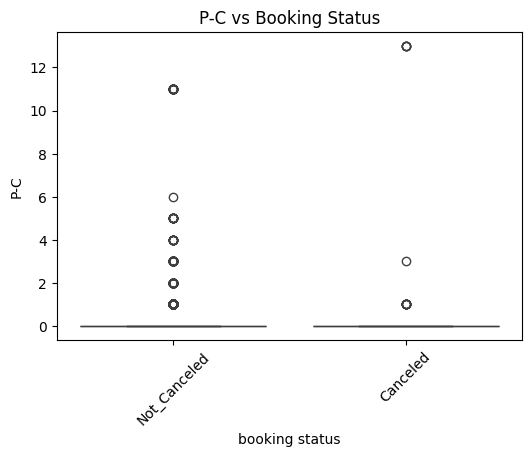

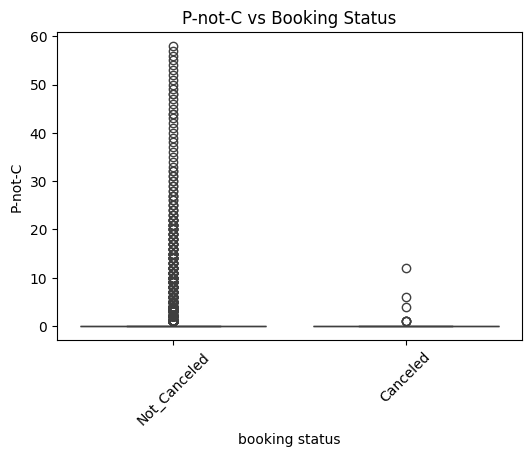

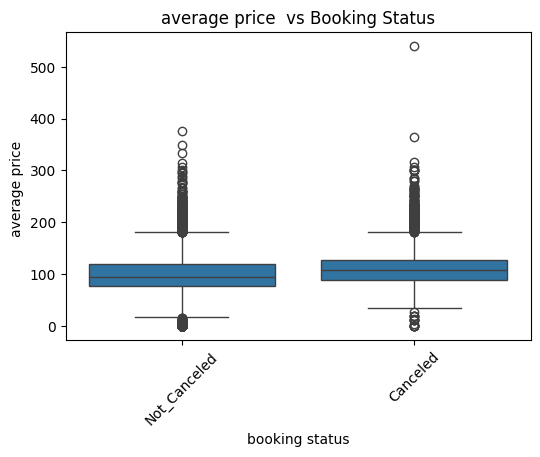

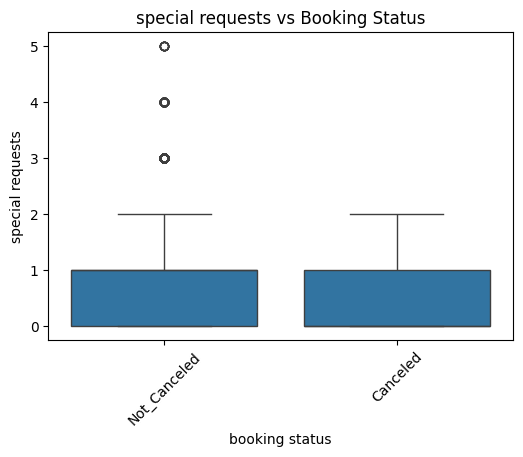

In [13]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='booking status', y=col, data=df)
    plt.title(f'{col} vs Booking Status')
    plt.xticks(rotation=45)
    plt.show()

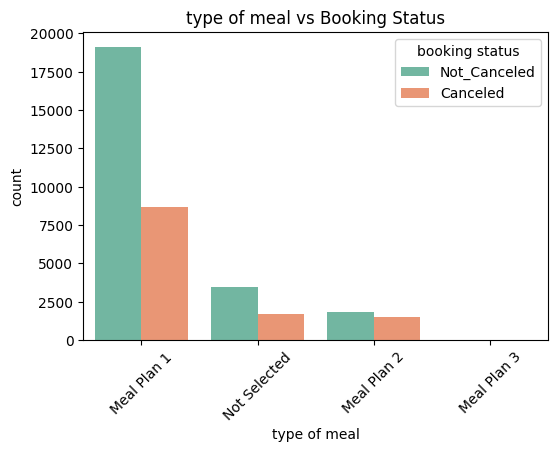

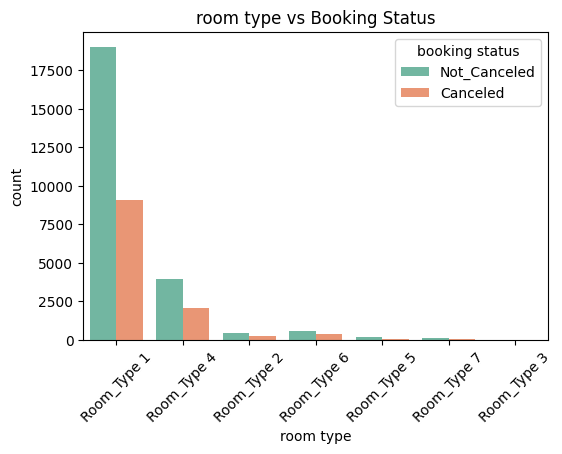

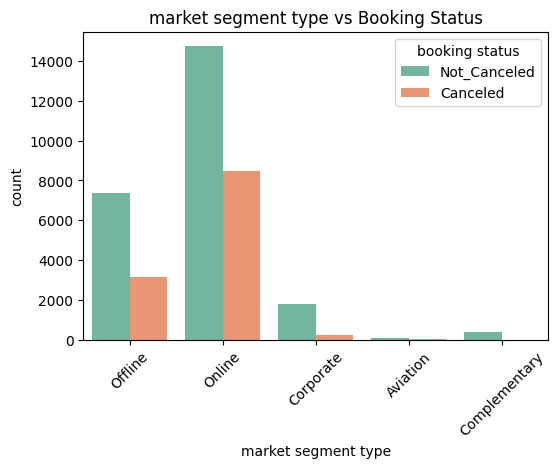

In [14]:
cat_cols = ['type of meal', 'room type', 'market segment type']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='booking status', data=df, palette='Set2')
    plt.title(f'{col} vs Booking Status')
    plt.xticks(rotation=45)
    plt.show()


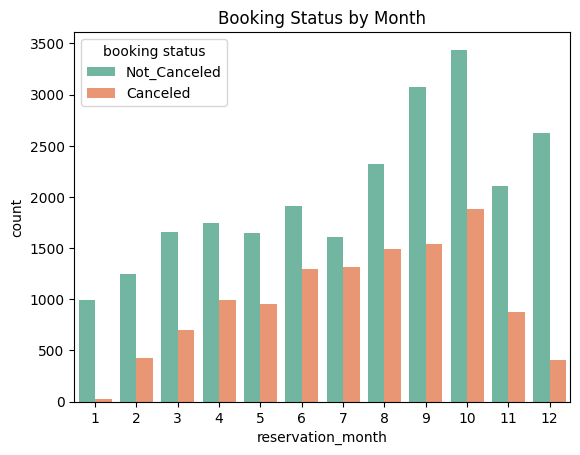

In [15]:
sns.countplot(x='reservation_month', hue='booking status', data=df,palette='Set2')
plt.title('Booking Status by Month')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_12152\1232705729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='booking status', y='lead time', palette='coolwarm')


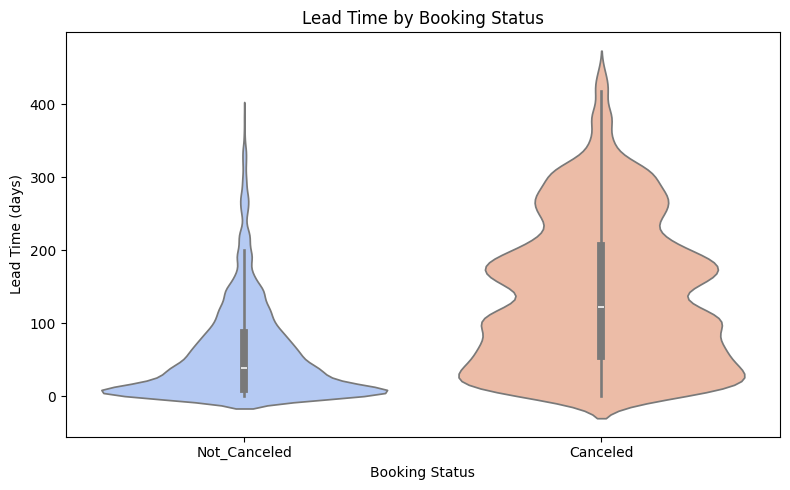

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='booking status', y='lead time', palette='coolwarm')
plt.title("Lead Time by Booking Status")
plt.xlabel("Booking Status")
plt.ylabel("Lead Time (days)")
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests', 'date of reservation',
       'booking status'],
      dtype='object')

C:\Users\USER\AppData\Local\Temp\ipykernel_12152\2859517095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='booking status', y='number of weekend nights', palette='Set3')


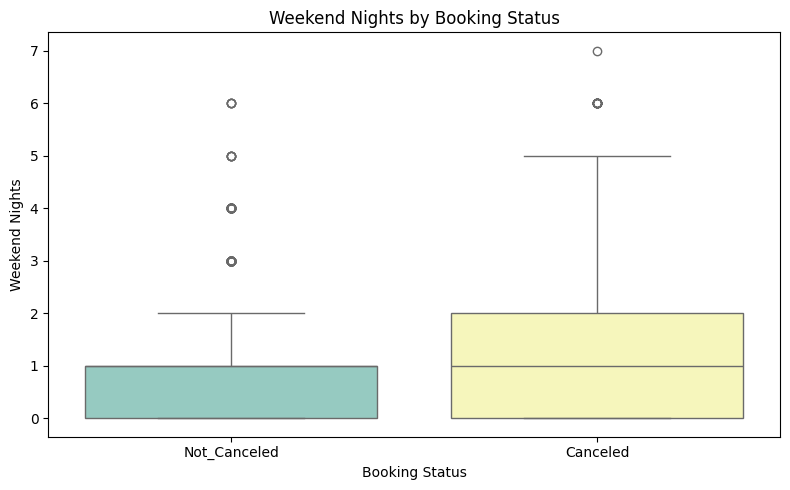

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='booking status', y='number of weekend nights', palette='Set3')
plt.title("Weekend Nights by Booking Status")
plt.xlabel("Booking Status")
plt.ylabel("Weekend Nights")
plt.tight_layout()
plt.show()


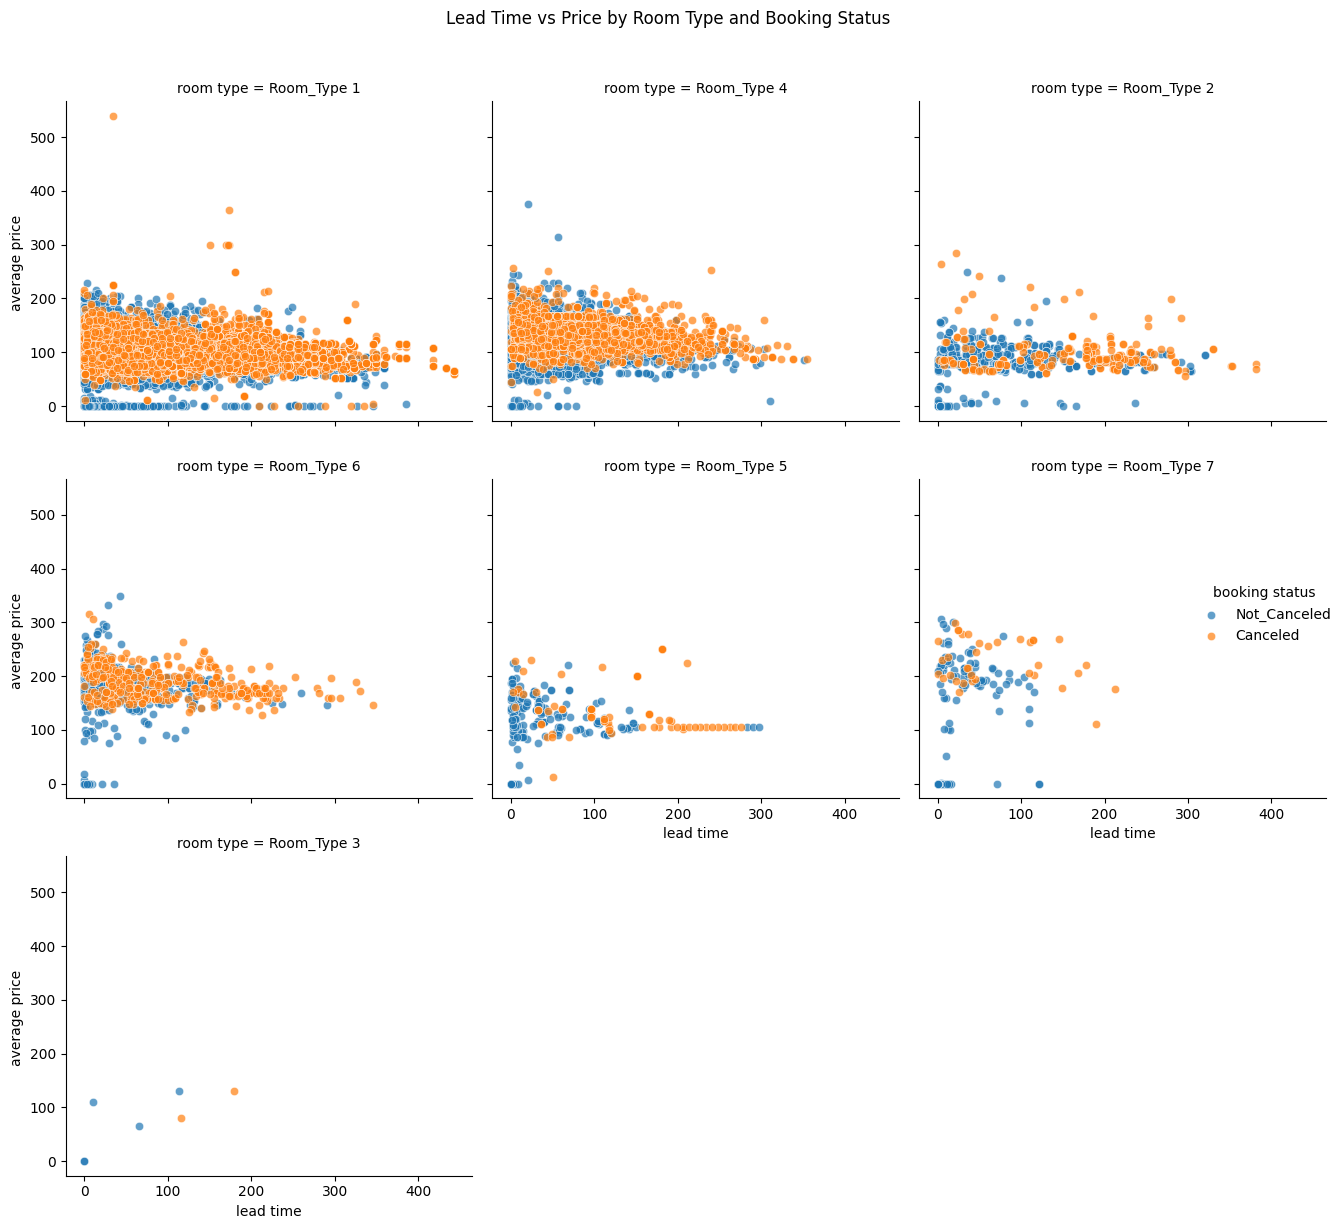

In [ ]:
g = sns.FacetGrid(df, col='room type', hue='booking status', col_wrap=3, height=4)
g.map(sns.scatterplot, 'lead time', 'average price ', alpha=0.7)
g.add_legend()
g.fig.suptitle('Lead Time vs Price by Room Type and Booking Status', y=1.02)
plt.tight_layout()
plt.show()


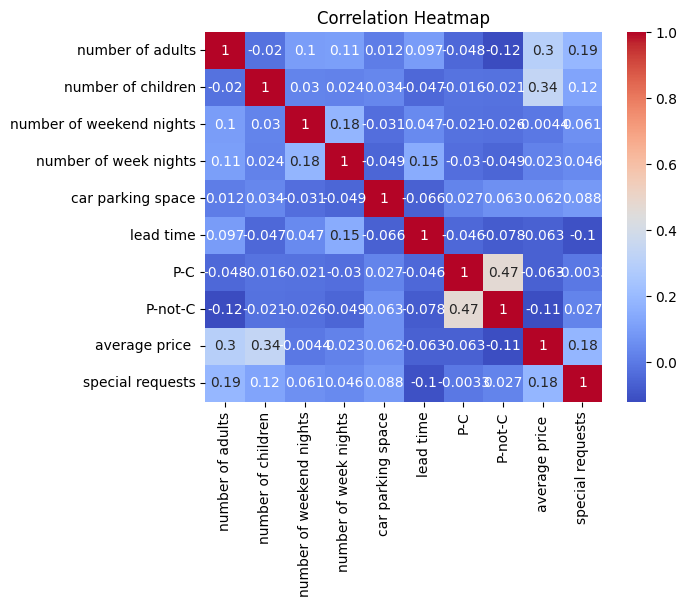

In [16]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="EDA Report")
profile.to_notebook_iframe()


ModuleNotFoundError: No module named 'ydata_profiling'